In [5]:
import matplotlib.pyplot as plt

In [6]:
# new pricing function that result from the solution
# of a differential equation
def get_swap_out_amount(A, B, a, b, m, p):
    exp = p*A/B
    return (b*((m + a)**exp) - b*(a**exp))/((m + a)**exp)

In [7]:
# X axis represents the amount of base token to sell
# Y axis represents the amount of quote token to get
# multiple curves are from different initial pool position
def plot_swap_out_amount_curve(A, B, a0, b0, p):
    M = [m for m in range(0, int(b0/(p*2)))]
    
    for xa in range(-int(a0/10), int(a0/10), 4):
        xb = get_swap_out_amount(A, B, a0, b0, xa, p)
        a = a0 + xa
        b = b0 - xb
        
        gM = []
        for m in M:
            buy_amount = get_swap_out_amount(A, B, a, b, m, p)        
            gM.append(buy_amount)
    
        plt.plot(M, gM, label="price curve when when a=" + str(round(a, 2)) + ", b=" + str(round(b, 2)))
    plt.plot(M, list(map(lambda m: p*m, M)), label="market price")

In [8]:
# x axis represents the amount of base token to sell
# y axis represents the total base/quote price
# multiple curves are from different initial pool position
def plot_price_curve(A, B, a0, b0, p):
    M = [m for m in range(0, int(b0/(p*2)))]
    
    for xa in range(-int(a0/10), int(a0/10), 4):
        xb = get_swap_out_amount(A, B, a0, b0, xa, p)
        a = a0 + xa
        b = b0 - xb
        
        gM = []
        for m in M:
            buy_amount = get_swap_out_amount(A, B, a, b, m, p)        
            if m == 0:
                gM.append(p*A*b/(B*a))
            else:
                gM.append(buy_amount/m)
    
        plt.plot(list(map(lambda m: m/a, M)), gM, label="price curve when a=" + str(round(a, 2)) + ", b=" + str(round(b, 2)))
    plt.plot(list(map(lambda m: m/a0, M)), [p]*len(M), label="market price")

In [9]:
# sample pool:
# target base reserve = 100 
# target quote reserve = 100 
# current base reserve = 100 (to be adjusted)
# current quote reserve = 100 (to be adjusted)
# oracle price = 2

A = 100
B = 100

a0 = 100
b0 = 100
p = 2

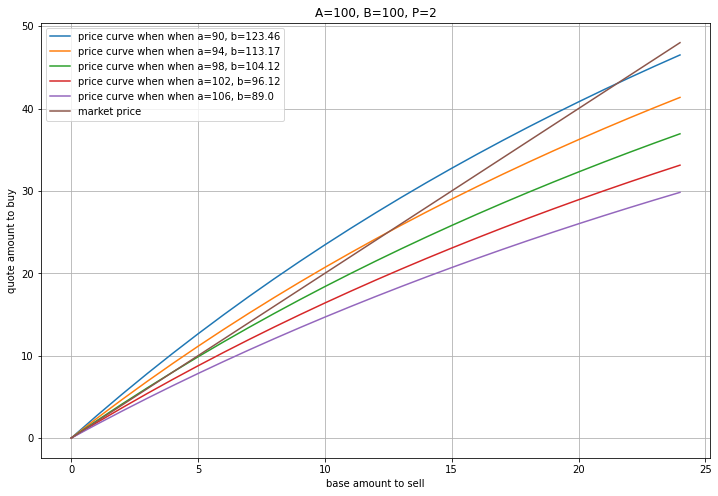

In [10]:
# plot base amount - quote amount curve
plt.figure(figsize = (12,8))
plot_swap_out_amount_curve(A, B, a0, b0, p)

plt.legend()
plt.title("A=" + str(round(A, 2)) + ", B=" + str(round(B, 2)) + ", P=" + str(round(p, 2)))
plt.xlabel("base amount to sell")
plt.ylabel("quote amount to buy")
plt.grid()
plt.show()

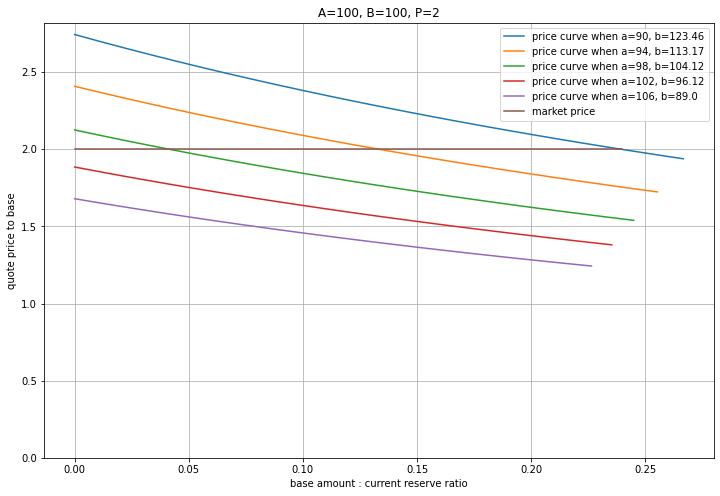

In [11]:
# plot base amount - base/quote price curve
plt.figure(figsize = (12,8))
plot_price_curve(A, B, a0, b0, p)

plt.legend()
plt.title("A=" + str(round(A, 2)) + ", B=" + str(round(B, 2)) + ", P=" + str(round(p, 2)))
plt.xlabel("base amount : current reserve ratio")
plt.ylabel("quote price to base")
plt.gca().set_ylim(bottom=0)
plt.grid()
plt.show()